Extract the zipfile and load the data into pandas

In [1]:
import zipfile
zip = zipfile.ZipFile('./archive.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

In [2]:
import pandas as pd # import the pandas library into a namespace called pd
movie_data = pd.read_csv('IMDB-Movie-Data.csv')

## Summarise Data

### What does .head() do?

You can check what a function does by adding a question mark after. As can be seen here

In [3]:
movie_data.head?

This is typically the first function you run after loading a dataset into Pandas. It gives you a quick overview of what your dataset looks like

In [4]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### What does .describe do?

Additionally running .describe() is useful as well. It summarizes all the columns with numerical datatypes

In [5]:
movie_data.describe?

In [6]:
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### How can you select a specific column?

Doing so returns a Pandas Series (as opposed to the dataframe we were working with before)

In [7]:
movie_data['Year']

0      2014
1      2012
2      2016
3      2016
4      2016
       ... 
995    2015
996    2007
997    2008
998    2014
999    2016
Name: Year, Length: 1000, dtype: int64

### How many movies were produced per year? Can you show this in a bar chart?

Pandas Series has a useful function for showing the counts of each value in a column

In [8]:
movie_data['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

You can also use .loc or .iloc but more on this later

In [9]:
movie_data.loc[:,'Year']

0      2014
1      2012
2      2016
3      2016
4      2016
       ... 
995    2015
996    2007
997    2008
998    2014
999    2016
Name: Year, Length: 1000, dtype: int64

In [10]:
movie_data.iloc[:,6]

0      2014
1      2012
2      2016
3      2016
4      2016
       ... 
995    2015
996    2007
997    2008
998    2014
999    2016
Name: Year, Length: 1000, dtype: int64

Additionally, Pandas also has a function to produce plots. We specify that we want a barchart

In [11]:
movie_data['Year'].value_counts().plot(kind='bar')

You can also plot it using matplotlib

<BarContainer object of 11 artists>

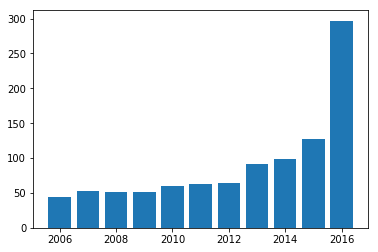

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(movie_data['Year'].value_counts().index, movie_data['Year'].value_counts().values)

## Slicing Data
### If you want a specific row, how would you get it?

There are two functions to use here. .iloc() and .loc()
<br /><br />
.iloc is 'Purely integer-location based indexing for selection by position'. It allows you to specify the row and column indices (as numbers). ':' means you're specifying the entire row/column
<br /><br />
.loc allows you to 'Access a group of rows and columns by label(s) or a boolean array.' This one allows you to specify numbers like in iloc, or labels (column/index names)
<br /><br />
For both you can also use boolean arrays

In [13]:
movie_data.iloc[0,:]

Rank                                                                  1
Title                                           Guardians of the Galaxy
Genre                                           Action,Adventure,Sci-Fi
Description           A group of intergalactic criminals are forced ...
Director                                                     James Gunn
Actors                Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
Year                                                               2014
Runtime (Minutes)                                                   121
Rating                                                              8.1
Votes                                                            757074
Revenue (Millions)                                               333.13
Metascore                                                            76
Name: 0, dtype: object

In [14]:
movie_data.loc[0,:]

Rank                                                                  1
Title                                           Guardians of the Galaxy
Genre                                           Action,Adventure,Sci-Fi
Description           A group of intergalactic criminals are forced ...
Director                                                     James Gunn
Actors                Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
Year                                                               2014
Runtime (Minutes)                                                   121
Rating                                                              8.1
Votes                                                            757074
Revenue (Millions)                                               333.13
Metascore                                                            76
Name: 0, dtype: object

Here's an example with a DataFrame which has strings for indices.

In [15]:
df = pd.DataFrame([[1, 2, 3],[4, 5 ,6], [7, 8, 9]], columns = ['c_a', 'c_b', 'c_c'], index = ['i_a', 'i_b', 'i_c'])

In [16]:
df

,c_a,c_b,c_c
i_a,1,2,3
i_b,4,5,6
i_c,7,8,9


In [17]:
df.loc['i_b','c_a']

4

### What's the difference between iloc and loc?

For both, you can select ranges of values as well. However, there's a key difference. When using ranges, iloc excludes the final entry, while loc is inclusive of the final entry.

In [18]:
movie_data.iloc[0:5,:]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [19]:
movie_data.loc[0:5,:]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0


In [20]:
movie_data.loc[0:5,['Genre','Director']]

,Genre,Director
0,"Action,Adventure,Sci-Fi",James Gunn
1,"Adventure,Mystery,Sci-Fi",Ridley Scott
2,"Horror,Thriller",M. Night Shyamalan
3,"Animation,Comedy,Family",Christophe Lourdelet
4,"Action,Adventure,Fantasy",David Ayer
5,"Action,Adventure,Fantasy",Yimou Zhang


The reason for this is that loc accepts labels in its range (and it would be very awkward to have to specify the next index to not be included every time)

In [21]:
df.loc['i_a':'i_b', :]

,c_a,c_b,c_c
i_a,1,2,3
i_b,4,5,6


### Can you show all the rows with more than the average number of votes?
We can get the average number of votes using .mean()

In [22]:
movie_data['Votes'].mean()

169808.255

We can then create a boolean array

In [23]:
movie_data['Votes'] > movie_data['Votes'].mean()

0       True
1       True
2      False
3      False
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Votes, Length: 1000, dtype: bool

Remember that iloc and loc can accept boolean arrays as well

In [24]:
movie_data.loc[movie_data['Votes'] > movie_data['Votes'].mean()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
954,955,Death Race,"Action,Sci-Fi,Thriller",Ex-con Jensen Ames is forced by the warden of ...,Paul W.S. Anderson,"Jason Statham, Joan Allen, Tyrese Gibson, Ian ...",2008,105,6.4,173731,36.06,43.0
957,958,End of Watch,"Crime,Drama,Thriller","Shot documentary-style, this film follows the ...",David Ayer,"Jake Gyllenhaal, Michael Peña, Anna Kendrick, ...",2012,109,7.7,192190,40.98,68.0
959,960,Lucky Number Slevin,"Crime,Drama,Mystery",A case of mistaken identity lands Slevin into ...,Paul McGuigan,"Josh Hartnett, Ben Kingsley, Morgan Freeman, L...",2006,110,7.8,271940,22.49,53.0
969,970,The Lone Ranger,"Action,Adventure,Western",Native American warrior Tonto recounts the unt...,Gore Verbinski,"Johnny Depp, Armie Hammer, William Fichtner,To...",2013,150,6.5,190855,89.29,NaN


## Copy
### When creating a new dataframe from your previous one (df2 = df), what happens if you edit one?

lets revisit the dataframe we made earlier

In [25]:
df

,c_a,c_b,c_c
i_a,1,2,3
i_b,4,5,6
i_c,7,8,9


In [26]:
df2 = df

In [27]:
df2

,c_a,c_b,c_c
i_a,1,2,3
i_b,4,5,6
i_c,7,8,9


We'll now assign all of column 'c_a' to 0 in the second dataframe

In [28]:
df2['c_a'] = 0

In [29]:
df2

,c_a,c_b,c_c
i_a,0,2,3
i_b,0,5,6
i_c,0,8,9


Notice that the original dataframe changed as well. The reason is that when doing the assingment the data itself isn't copied. So df and df2 point to the same space in memory. Changes to one changes the other

In [30]:
df

,c_a,c_b,c_c
i_a,0,2,3
i_b,0,5,6
i_c,0,8,9


### What does .copy() do? Why might it be useful?
Lets make a new dataframe, and copy it this time before making changes. This time, the original dataframe remained unchanged. Copy creates a new copy of the entire data. So df3 and df4 point to two different places in memory

In [31]:
df3 = pd.DataFrame([[1, 2, 3],[4, 5 ,6], [7, 8, 9]], columns = ['c_a', 'c_b', 'c_c'], index = ['i_a', 'i_b', 'i_c'])

In [32]:
df4 = df3.copy()

In [33]:
df4['c_a'] = 5

In [34]:
df4

,c_a,c_b,c_c
i_a,5,2,3
i_b,5,5,6
i_c,5,8,9


In [35]:
df3

,c_a,c_b,c_c
i_a,1,2,3
i_b,4,5,6
i_c,7,8,9


## Create new columns
### Create a new column called ‘centered rating’. This column will contain the rating minus the average (if the average was 5, and an original rating was 8, the new rating will be 3)

Since we're now making changes to the dataframe, lets copy it in case we want to reference the original.

In [36]:
movie_data2 = movie_data.copy()

Pandas makes it really easy to add a column

In [37]:
movie_data2['centered_rating'] = movie_data2['Rating'] - movie_data2['Rating'].mean()

In [38]:
movie_data2.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,centered_rating
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,1.3768
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,0.2768
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,0.5768
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,0.4768
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,-0.5232


We can visualise the change like this

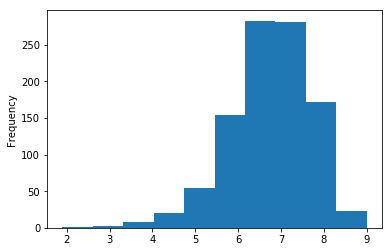

In [39]:
movie_data2['Rating'].plot(kind = 'hist')

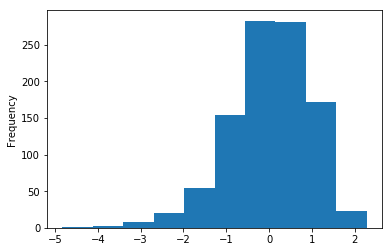

In [40]:
movie_data2['centered_rating'].plot(kind = 'hist')

## Apply
### What does .apply() do?
.apply() takes a function as an input. It then applies the function to each row of the dataframe/series and returns a new dataframe/series. However, if your function applies a change to your dataframe, it will change the original dataframe

For example in df, if we wanted to square each of the values in the second column we can do as follows.


First, we define three fuctions. The first function just returns the square of the input. The second takes a row of a dataframe, changes that row and returns it. The third function squares the entire row.

In [41]:
def sqrInt(row):
    row = row**2
    return row

In [42]:
def sqrFirstCol(row):
    row.iloc[1] = row.iloc[1]**2
    return row

In [43]:
def sqrAllCol(row):
    return row**2

In [44]:
df = pd.DataFrame([[1, 2, 3],[4, 5 ,6], [7, 8, 9]], columns = ['c_a', 'c_b', 'c_c'], index = ['i_a', 'i_b', 'i_c'])

First we apply it to the second columns. Note that this is a series, so .apply() applies the function to each value in this case it's an int.

In [45]:
df['c_b'].apply(sqrInt)

i_a     4
i_b    25
i_c    64
Name: c_b, dtype: int64

The original dataframe is unchanged

In [46]:
df

,c_a,c_b,c_c
i_a,1,2,3
i_b,4,5,6
i_c,7,8,9


However, if we use .apply on the entire dataframe, .apply applies the function on each row now. Because in our function we apply a change to the row itself

In [47]:
df.apply(sqrFirstCol, axis = 1)

,c_a,c_b,c_c
i_a,1,4,3
i_b,4,25,6
i_c,7,64,9


In [48]:
df

,c_a,c_b,c_c
i_a,1,4,3
i_b,4,25,6
i_c,7,64,9


Here, we can also use an anonymous function called a lambda. It looks like a waste to define a function for something as simple as squaring a value. Lambdas are single line functions that only exist for where they are specified. The vaguely take the form as follows. Note that you cannot do assignments in lambdas.

lambda input : operation(input)

This will return the output operation(input)

In [49]:
df.apply(lambda x : x**2, axis = 1)

,c_a,c_b,c_c
i_a,1,16,9
i_b,16,625,36
i_c,49,4096,81


If we use the third function, it doesn't change the row itself whithin the function, so after using apply the original is unchanged.

In [50]:
df.apply(sqrAllCol, axis = 1)

,c_a,c_b,c_c
i_a,1,16,9
i_b,16,625,36
i_c,49,4096,81


In [51]:
df

,c_a,c_b,c_c
i_a,1,4,3
i_b,4,25,6
i_c,7,64,9


### Can you use it to change all the runtimes that are greater than 100, to just 100?
Here we use a lambda that returns the value if it is less than or equal to 100, but return 100 otherwise. Since we are use a lambda function and we are using apply on a series, .apply will not affect the original dataframe. So we will have to assign the result back to the original dataframe.

In [52]:
movie_data2['Runtime (Minutes)'] = movie_data2['Runtime (Minutes)'].apply(lambda x : x if x <= 100 else 100)

In [53]:
movie_data2.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,centered_rating
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,100,8.1,757074,333.13,76.0,1.3768
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,100,7.0,485820,126.46,65.0,0.2768
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,100,7.3,157606,138.12,62.0,0.5768
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,100,7.2,60545,270.32,59.0,0.4768
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,100,6.2,393727,325.02,40.0,-0.5232


The above lambda function is equivalent to this function

In [54]:
def runTimeFunction(x):
    if x <= 100:
        return x
    else:
        return 100

## Final Challenge
### Create a new column for each genre. Fill these with 1s or 0s depending on if the movie has that genre or not

First, we have to get a list of all the unique genres. First we get the series containing the genre

In [55]:
movie_data2.Genre

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

Then we convert it to a list

In [72]:
list(movie_data2.Genre)[0:20]

['Action,Adventure,Sci-Fi',
 'Adventure,Mystery,Sci-Fi',
 'Horror,Thriller',
 'Animation,Comedy,Family',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Fantasy',
 'Comedy,Drama,Music',
 'Comedy',
 'Action,Adventure,Biography',
 'Adventure,Drama,Romance',
 'Adventure,Family,Fantasy',
 'Biography,Drama,History',
 'Action,Adventure,Sci-Fi',
 'Animation,Adventure,Comedy',
 'Action,Comedy,Drama',
 'Animation,Adventure,Comedy',
 'Biography,Drama,History',
 'Action,Thriller',
 'Biography,Drama',
 'Drama,Mystery,Sci-Fi']

then we create a new list by iterating through all the values, splitting them by commas, and adding all the entries to a list

In [57]:
genre_list = []

for genres in list(movie_data2.Genre):
    for genre in genres.split(','):
        genre_list.append(genre)

In [71]:
genre_list[0:20]

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music']

However, it's clear that we have lots a repeats. We can convert it to a set and back to a list to remove all the repeats

In [64]:
sorted(list(set(genre_list)))

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

We can do all of this in a single line, and create the columns

In [60]:
for col in sorted(list(set([genre for genres in list(movie_data2.Genre) for genre in genres.split(',')]))):
    movie_data2[col] = 0

we specficy a quick a function to assign a 1 or 0 to the correct column

In [61]:
def g_check(row):
    g = row.Genre.split(',')
    for i in g:
        row[g] = 1
    return row

and we can apply is using a lambda. Remember we're not changing any of the row's values, so we have to assign it in the end.

In [62]:
movie_data2 = movie_data2.apply(g_check, axis = 1)

In [67]:
movie_data2.loc[:,'Action':'Western'].head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
